In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
uploaded = files.upload()

import io

data_frame = pd.read_csv(io.BytesIO(uploaded['crime_data.csv']))

Saving crime_data.csv to crime_data.csv


In [3]:
data_frame.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134900 entries, 0 to 134899
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            134900 non-null  int64  
 1   ID                    134900 non-null  int64  
 2   Case Number           134900 non-null  object 
 3   Date                  134900 non-null  object 
 4   Block                 134900 non-null  object 
 5   IUCR                  134900 non-null  object 
 6   Primary Type          134900 non-null  object 
 7   Description           134900 non-null  object 
 8   Location Description  134777 non-null  object 
 9   Arrest                134900 non-null  bool   
 10  Domestic              134900 non-null  bool   
 11  Beat                  134900 non-null  int64  
 12  District              134900 non-null  int64  
 13  Ward                  134899 non-null  float64
 14  Community Area        134900 non-null  int64  
 15  

In [7]:
data_frame=data_frame.dropna()

In [8]:
data_frame = data_frame.sample(n=100000)

In [9]:
data_frame = data_frame.drop(['Unnamed: 0'], axis=1)
data_frame = data_frame.drop(['ID'], axis=1)
data_frame = data_frame.drop(['Case Number'], axis=1) 

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 72240 to 39919
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  bool   
 7   Domestic              100000 non-null  bool   
 8   Beat                  100000 non-null  int64  
 9   District              100000 non-null  int64  
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  int64  
 12  FBI Code              100000 non-null  object 
 13  X Coordinate          100000 non-null  float64
 14  Y Coordinate          100000 non-null  float64
 1

In [11]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
data_frame['date2'] = pd.to_datetime(data_frame['Date'])
data_frame['Year'] = data_frame['date2'].dt.year
data_frame['Month'] = data_frame['date2'].dt.month
data_frame['Day'] = data_frame['date2'].dt.day
data_frame['Hour'] = data_frame['date2'].dt.hour
data_frame['Minute'] = data_frame['date2'].dt.minute
data_frame['Second'] = data_frame['date2'].dt.second 
data_frame = data_frame.drop(['Date'], axis=1) 
data_frame = data_frame.drop(['date2'], axis=1) 
data_frame = data_frame.drop(['Updated On'], axis=1)
data_frame.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
72240,023XX N KENMORE AVE,1330,CRIMINAL TRESPASS,TO LAND,COLLEGE/UNIVERSITY RESIDENCE HALL,True,False,1811,18,32.0,...,1915771.0,2015,41.924398,-87.654788,"(41.924397747, -87.654787614)",3,19,14,30,0
74449,039XX S FRANCISCO AVE,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,STREET,True,False,921,9,14.0,...,1878495.0,2015,41.822345,-87.697114,"(41.822345406, -87.697114364)",3,22,19,39,0
21628,001XX W 116TH ST,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,522,5,34.0,...,1827683.0,2016,41.682492,-87.626939,"(41.682491751, -87.626939306)",5,26,13,0,0
107776,105XX S PROSPECT AVE,810,THEFT,OVER $500,STREET,False,False,2212,22,19.0,...,1834988.0,2015,41.702748,-87.661862,"(41.702748452, -87.661861651)",5,7,20,30,0
79506,039XX W MADISON ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,1122,11,28.0,...,1899720.0,2015,41.880741,-87.724572,"(41.880741173, -87.724572141)",3,30,11,25,0


In [12]:
# Convert Categorical Attributes to Numerical
data_frame['Block'] = pd.factorize(data_frame["Block"])[0]
data_frame['IUCR'] = pd.factorize(data_frame["IUCR"])[0]
data_frame['Description'] = pd.factorize(data_frame["Description"])[0]
data_frame['Location Description'] = pd.factorize(data_frame["Location Description"])[0]
data_frame['FBI Code'] = pd.factorize(data_frame["FBI Code"])[0]
data_frame['Location'] = pd.factorize(data_frame["Location"])[0] 

In [13]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


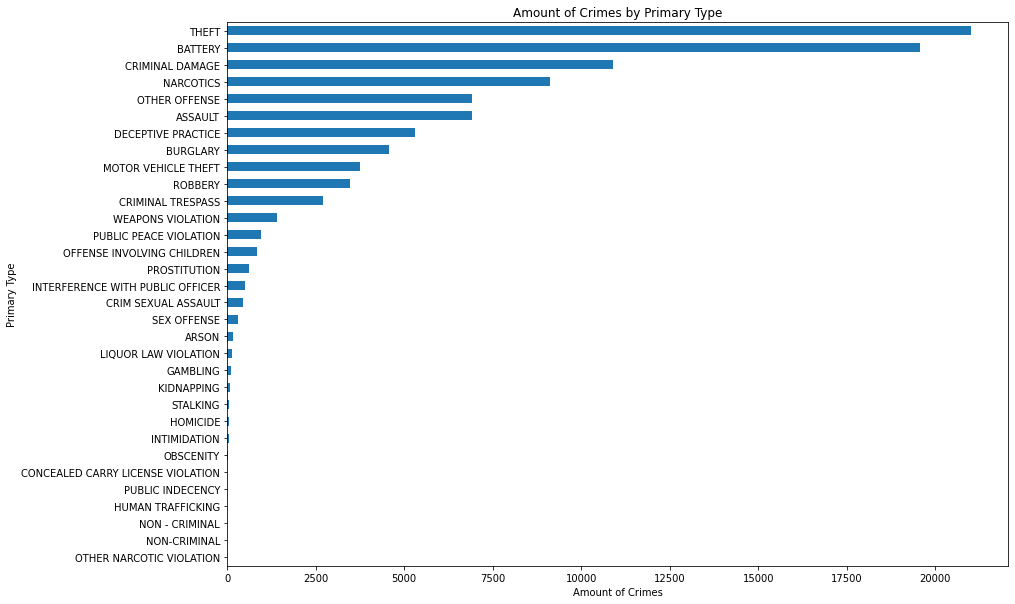

In [15]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

data_frame.groupby([data_frame['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [17]:
all_classes = data_frame.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
15,LIQUOR LAW VIOLATION,128
9,GAMBLING,101
14,KIDNAPPING,69
29,STALKING,58
10,HOMICIDE,57
13,INTIMIDATION,46
20,OBSCENITY,14
4,CONCEALED CARRY LICENSE VIOLATION,11
25,PUBLIC INDECENCY,8
18,NON - CRIMINAL,4


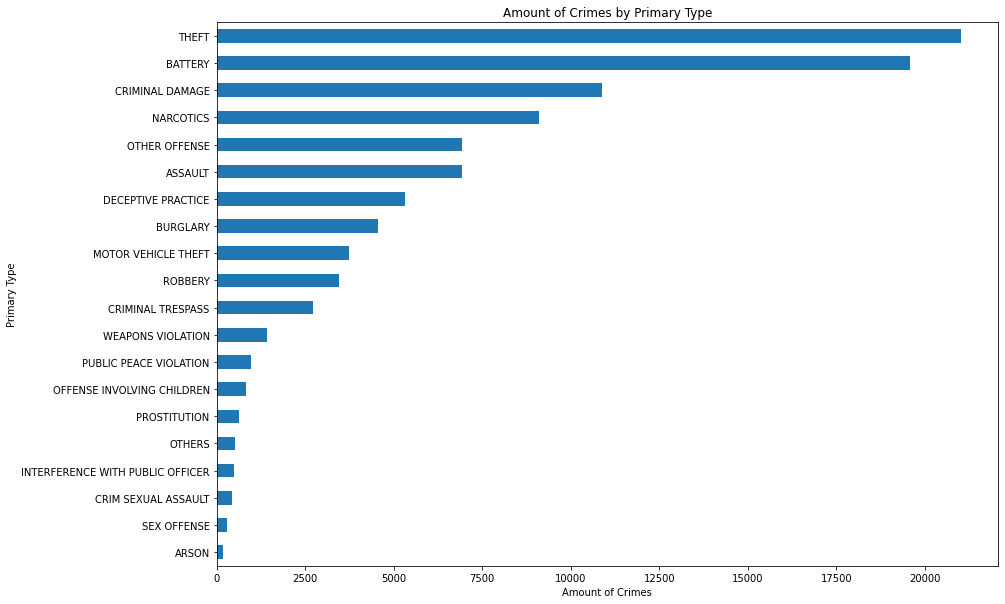

In [18]:
data_frame.loc[data_frame['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

data_frame.groupby([data_frame['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [20]:
Classes = data_frame['Primary Type'].unique()
Classes

array(['CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'DECEPTIVE PRACTICE', 'THEFT', 'NARCOTICS', 'CRIMINAL DAMAGE',
       'BATTERY', 'WEAPONS VIOLATION', 'BURGLARY', 'OTHER OFFENSE',
       'OTHERS', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'PROSTITUTION', 'ARSON'],
      dtype=object)

In [21]:
#Encode target labels into categorical variables:
data_frame['Primary Type'] = pd.factorize(data_frame["Primary Type"])[0] 
data_frame['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

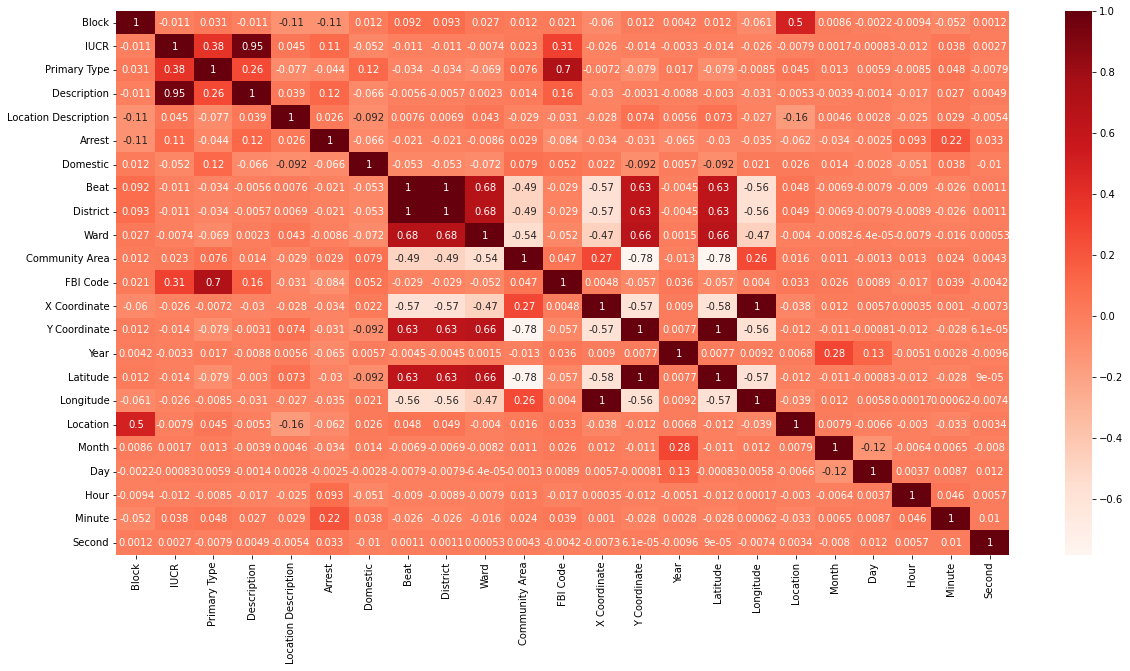

In [22]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = data_frame.drop(['Primary Type'], axis=1)
Y_fs = data_frame['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = data_frame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.380910
Primary Type    1.000000
Description     0.263520
FBI Code        0.701591
Name: Primary Type, dtype: float64

In [24]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [25]:
#Split dataset to Training Set & Test Set
from sklearn.model_selection import train_test_split
x, y = train_test_split(data_frame, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 10)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


In [26]:
# Random Forest
# Create Model with configuration
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [29]:
# Model Evaluation
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.99615
Recall      :  0.99615
Precision   :  0.9961099892111548
F1 Score    :  0.99615
Confusion Matrix: 
[[ 543    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0]
 [   0   94    0    0    0    0    0    0    0    0    0    0    0    0
     0    6    0    0    0    0]
 [   0    0 1082    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0 4294    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0 1835    0    0    0    0    0    0    0    0    0
     0    3    0    0    0    0]
 [   0    0    0    0    0 2169    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0 3863    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  246    8    0    0    0    0    0
     0    0    0    0    0 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                                  precision    recall  f1-score   support

               CRIMINAL TRESPASS       1.00      1.00      1.00       544
INTERFERENCE WITH PUBLIC OFFICER       1.00      0.94      0.97       100
              DECEPTIVE PRACTICE       1.00      1.00      1.00      1082
                           THEFT       1.00      1.00      1.00      4294
                       NARCOTICS       1.00      1.00      1.00      1838
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2169
                         BATTERY       1.00      1.00      1.00      3863
               WEAPONS VIOLATION       0.99      0.97      0.98       254
                        BURGLARY       0.99      1.00      1.00       899
                   OTHER OFFENSE       0.98      1.00      0.99      1368
                          OTHERS       0.94      0.70      0.80       104
             MOTOR VEHICLE THEFT       1.00      1.0

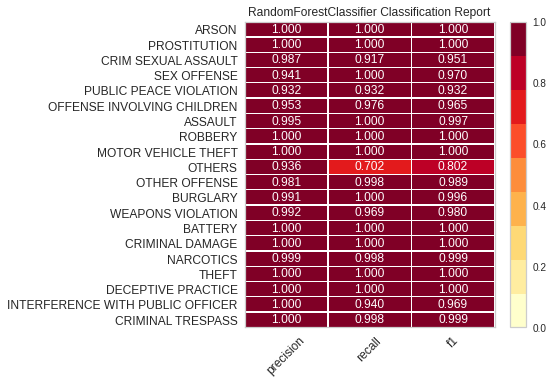

In [30]:
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()    

In [31]:
# K-Nearest Neighbors
# Create Model with configuration 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [32]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.99945
Recall      :  0.99945
Precision   :  0.99945358937948
F1 Score    :  0.99945
Confusion Matrix: 
[[ 544    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0  100    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0 1082    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0 4294    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0 1838    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0 2169    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    2    0 3861    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    2    0    0    0    0  251    0    0    1    0    0    0
     0    0    0    0  

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                                  precision    recall  f1-score   support

               CRIMINAL TRESPASS       1.00      1.00      1.00       544
INTERFERENCE WITH PUBLIC OFFICER       1.00      1.00      1.00       100
              DECEPTIVE PRACTICE       1.00      1.00      1.00      1082
                           THEFT       1.00      1.00      1.00      4294
                       NARCOTICS       1.00      1.00      1.00      1838
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2169
                         BATTERY       1.00      1.00      1.00      3863
               WEAPONS VIOLATION       1.00      0.99      0.99       254
                        BURGLARY       1.00      1.00      1.00       899
                   OTHER OFFENSE       1.00      1.00      1.00      1368
                          OTHERS       0.97      0.99      0.98       104
             MOTOR VEHICLE THEFT       1.00      1.0

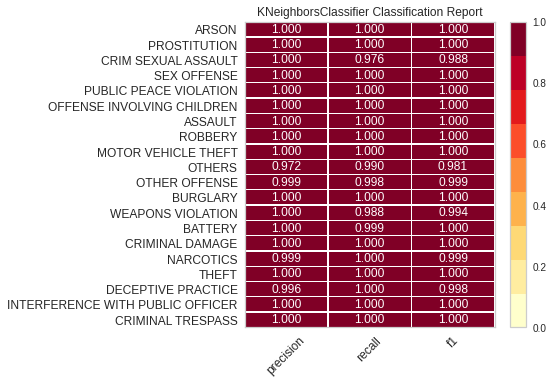

In [33]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()         